In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import mne
import logging
import numpy as np
import matplotlib.pyplot as plt
from cerebra_atlas_python.cerebra import CerebrA 
from cerebra_atlas_python.plotting import get_cmap_colors,add_grid_to_ax, remove_ax
from cerebra_atlas_python.mni_average import MNIAverage

In [3]:
cerebra = CerebrA()

([<matplotlib.patches.Wedge at 0x76625e000280>,
 [Text(-0.3655903556118915, 1.0374698510721025, 'Cortical (N=62)'),
  Text(0.3655904527468272, -1.037469816843059, 'Non-cortical (N=40)')])

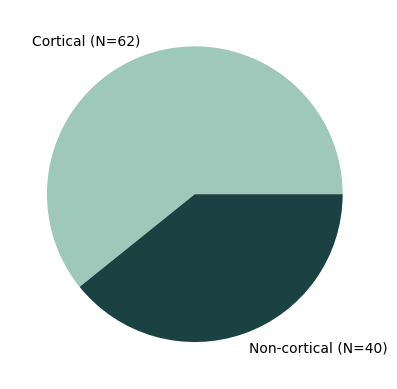

In [4]:
# CORTICAL vs NON-CORTICAL pie chart
n_cortical = np.sum(cerebra.label_details["cortical"])
n_non_cortical = 102 - n_cortical
plt.pie([n_cortical, n_non_cortical],labels=[f"Cortical (N={n_cortical})", f"Non-cortical (N={n_non_cortical})"], colors=[cerebra.cortical_color,cerebra.non_cortical_color])

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

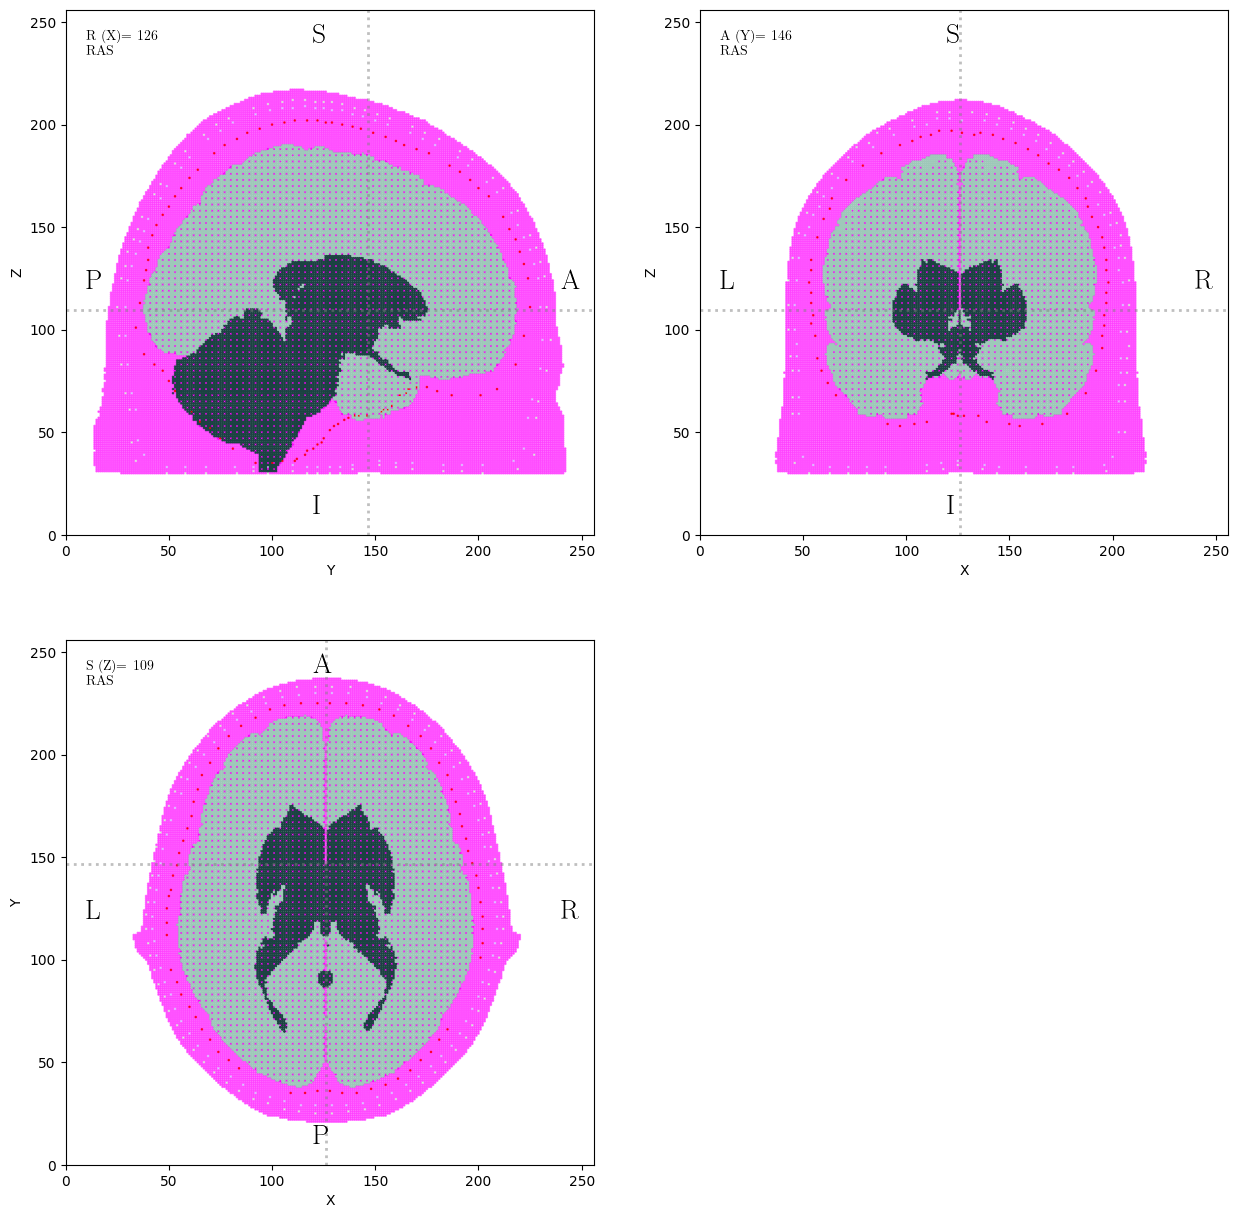

In [5]:
cerebra = CerebrA()

cerebra.orthoview(plot_regions=True,plot_t1_volume=True, plot_affine=True, plot_src_space=True, plot_cortical=True, plot_bem_surfaces=True)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X (R)', ylabel='Y (A)', zlabel='Z (S)'>)

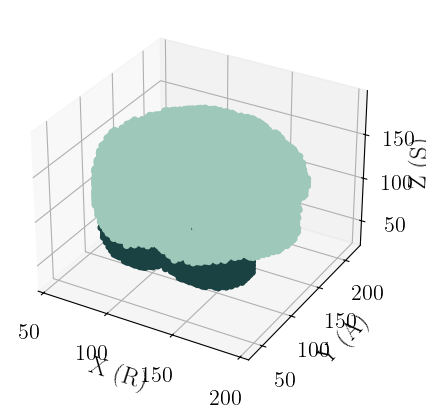

In [6]:
cerebra.plot_3d(plot_regions=True, plot_src_space=False, density=4, plot_cortical=True)

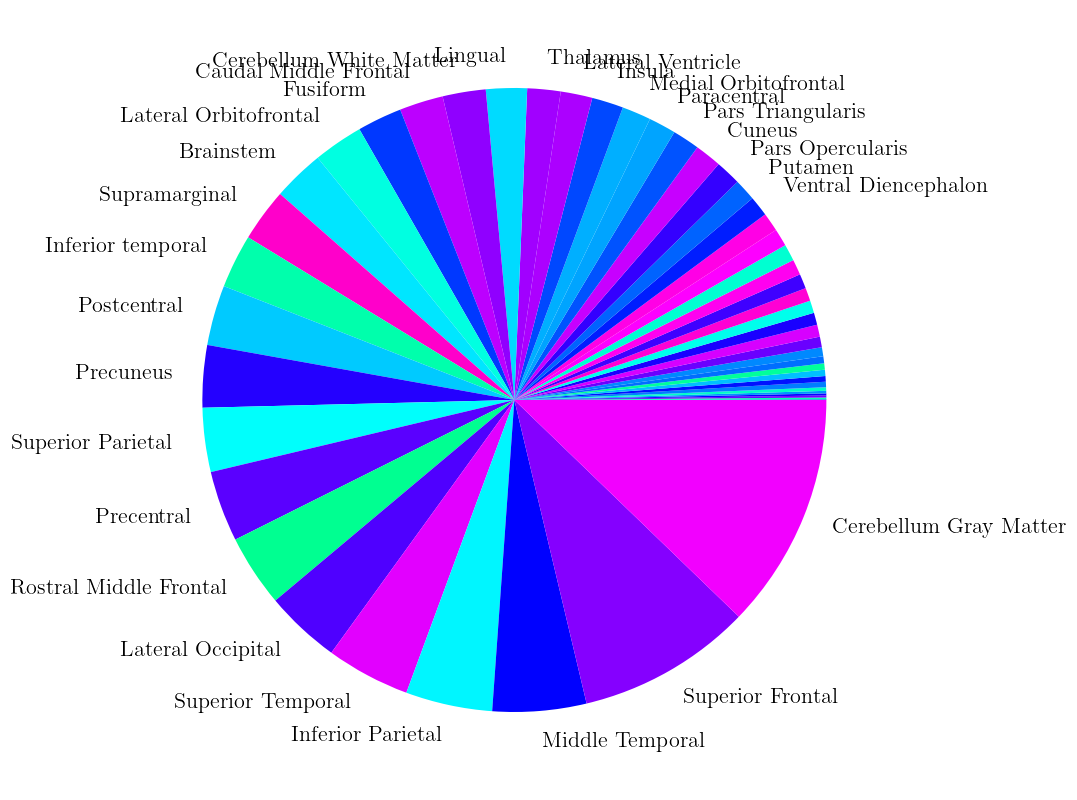

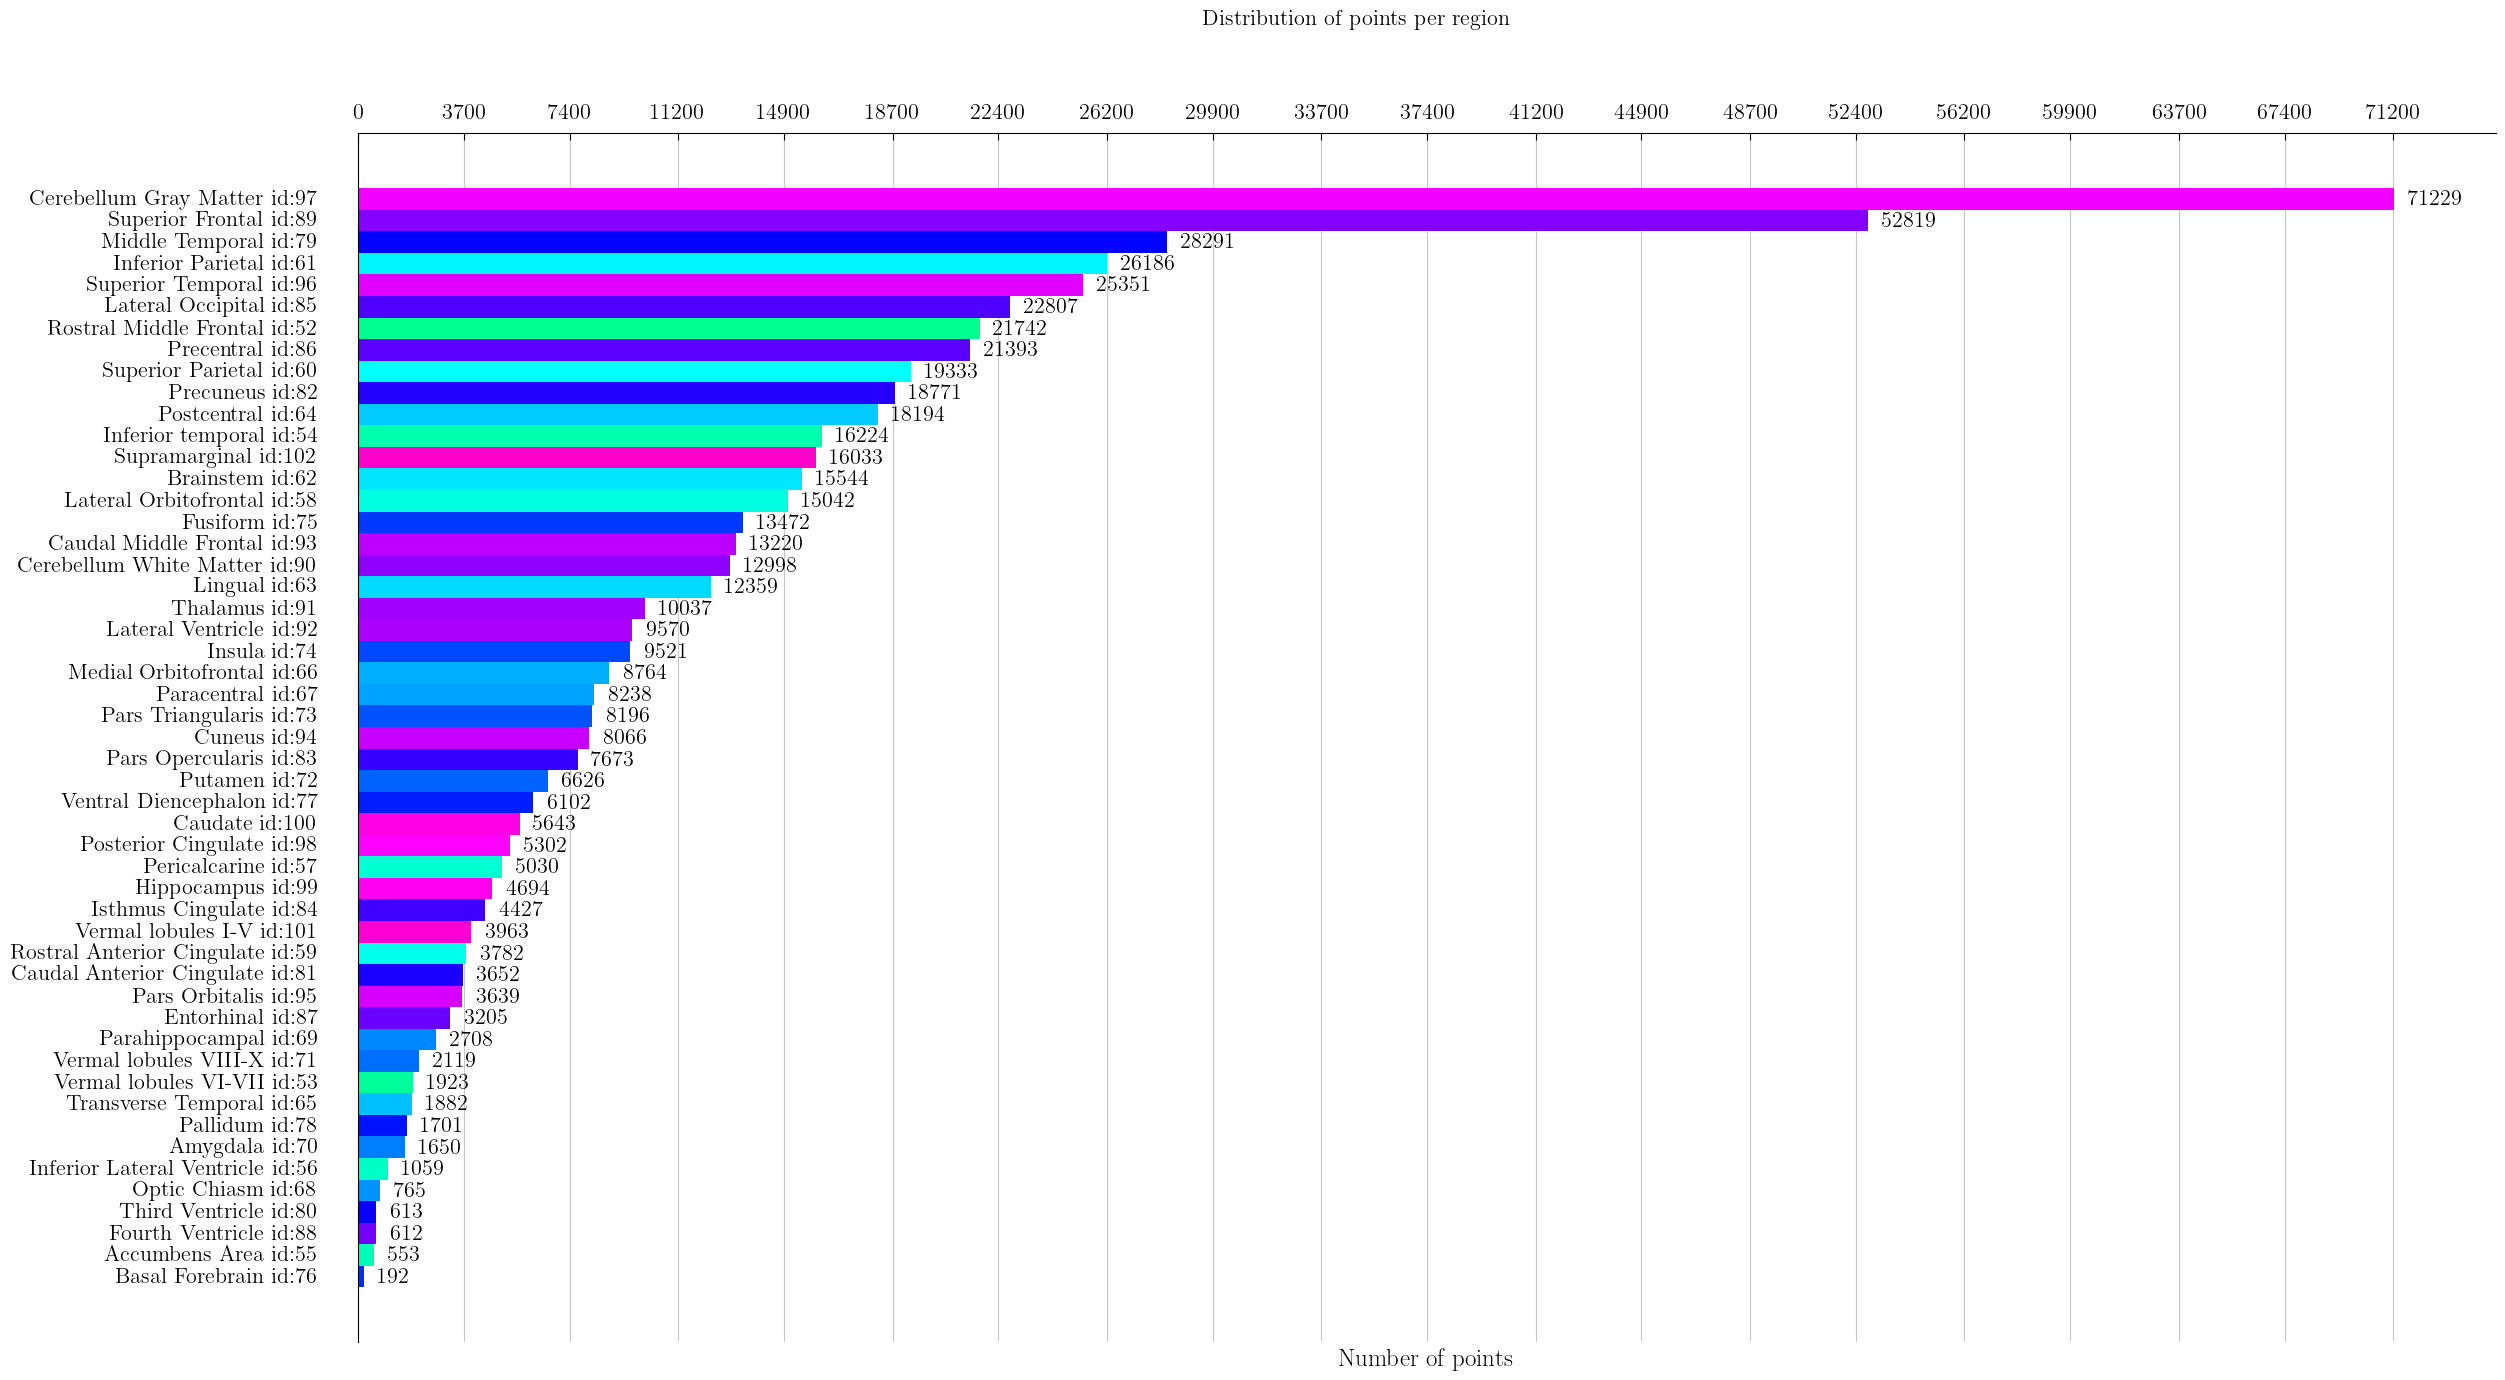

In [8]:
plt.close("all")

PLOT_ONLY_CORTICAL = False 
PLOT_ONLY_NON_CORTICAL = False 
# Else plot both
INCLUDE_WHITE_MATTER = False 


# LOG scale for histogram
# Distribution of points per region
# Keep only leftside labels (symmetrical)
leftside_label_details = cerebra.label_details[cerebra.label_details['hemisphere'] == "Left"].copy()
wm_label_details = cerebra.label_details[cerebra.label_details['Label Name'] == "White matter"].copy()

n_points = np.array([cerebra.get_n_points_from_region_id(region_id) for region_id in leftside_label_details['CerebrA ID'].values])
leftside_label_details["npoints"] = n_points

cortical_label_details = leftside_label_details.loc[leftside_label_details['cortical'] == True,:].copy()
non_cortical_label_details = leftside_label_details.loc[leftside_label_details['cortical'] == False,:].copy()

leftside_label_details.sort_values(by=['npoints'],inplace=True)
cortical_label_details.sort_values(by=['npoints'],inplace=True)
non_cortical_label_details.sort_values(by=['npoints'],inplace=True)

white_matter_n_points = cerebra.get_n_points_from_region_id(103)
empty_n_points = cerebra.get_n_points_from_region_id(0)



# Define data and colors for each bar
if PLOT_ONLY_CORTICAL:
    data = np.array([*cortical_label_details["npoints"].values])
    colors = np.array([*cortical_label_details["color"].values])
    labels = np.array([*cortical_label_details["Label Name"].values])
    label_ids = np.array(cortical_label_details['CerebrA ID'].values)
elif PLOT_ONLY_NON_CORTICAL:
    data = np.array([*non_cortical_label_details["npoints"].values])
    colors = np.array([*non_cortical_label_details["color"].values])
    labels = np.array([*non_cortical_label_details["Label Name"].values])
    label_ids = np.array(non_cortical_label_details['CerebrA ID'].values)
elif INCLUDE_WHITE_MATTER:
    data = np.array([white_matter_n_points,*leftside_label_details["npoints"].values])
    colors = np.array([wm_label_details["color"].item(), *leftside_label_details["color"].values])
    labels = np.array([wm_label_details["Label Name"].item(),*leftside_label_details["Label Name"].values])
    label_ids = np.array([wm_label_details["CerebrA ID"].item(),*leftside_label_details['CerebrA ID'].values])
else:
    data = np.array([*leftside_label_details["npoints"].values])
    colors = np.array([ *leftside_label_details["color"].values])
    labels = np.array([*leftside_label_details["Label Name"].values])
    label_ids = np.array([*leftside_label_details['CerebrA ID'].values])
    
# PIE CHART
fig2,ax2 = plt.subplots()
fig2.set_size_inches(12, 10)
threshold = data.sum() * 0.01
labels_pie = [l if data[i] > threshold else "" for i,l in enumerate(labels)]
ax2.pie(data,colors=colors,labels=labels_pie)
plt.show()
# HISTOGRAM
fig, ax = plt.subplots()
ax = remove_ax(ax,keep_names=["left","top"])    
    
for i, n_pts in enumerate(data):
    if n_pts == 0:
        continue
    p =ax.barh(i,n_pts, color=colors[i], linestyle='-', height=1,label=labels[i],edgecolor = "white", linewidth=0)
    # ax.bar_label(p, label_type='edge', padding=10,fontsize=16)
    ax.bar_label(p, label_type='edge', padding=10,fontsize=16,fontweight='bold')

add_grid_to_ax(ax)
ax.xaxis.tick_top()

fig.suptitle(f"Distribution of points per {'(cortical)' if PLOT_ONLY_CORTICAL else '(non-cortical)' if PLOT_ONLY_NON_CORTICAL else ''} region")

ax.set_xlabel("Number of points")
ax.set_xticks((np.linspace(0,data.max(),num=20) / 100).astype(int) *100)

# # Add labels to bins

for i,(name,id) in enumerate(zip(labels,label_ids)):
    ax.text(-data.max()*0.02,i, f"{name} id:{id}",fontsize=16,verticalalignment='center',horizontalalignment='right')

fig.set_size_inches(28.5, 15.5)




# mngr = plt.get_current_fig_manager()
# geom = mngr.window.geometry()
# x,y,dx,dy = geom.getRect()
# mngr.window.setGeometry(2600, 00, dx, dy)

# mngr.window.setGeometry(500,100,640, 545)

Source space n points: (43498,)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

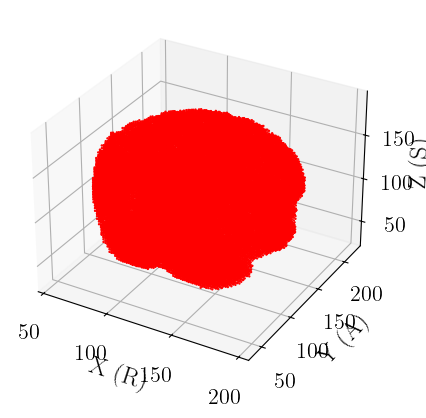

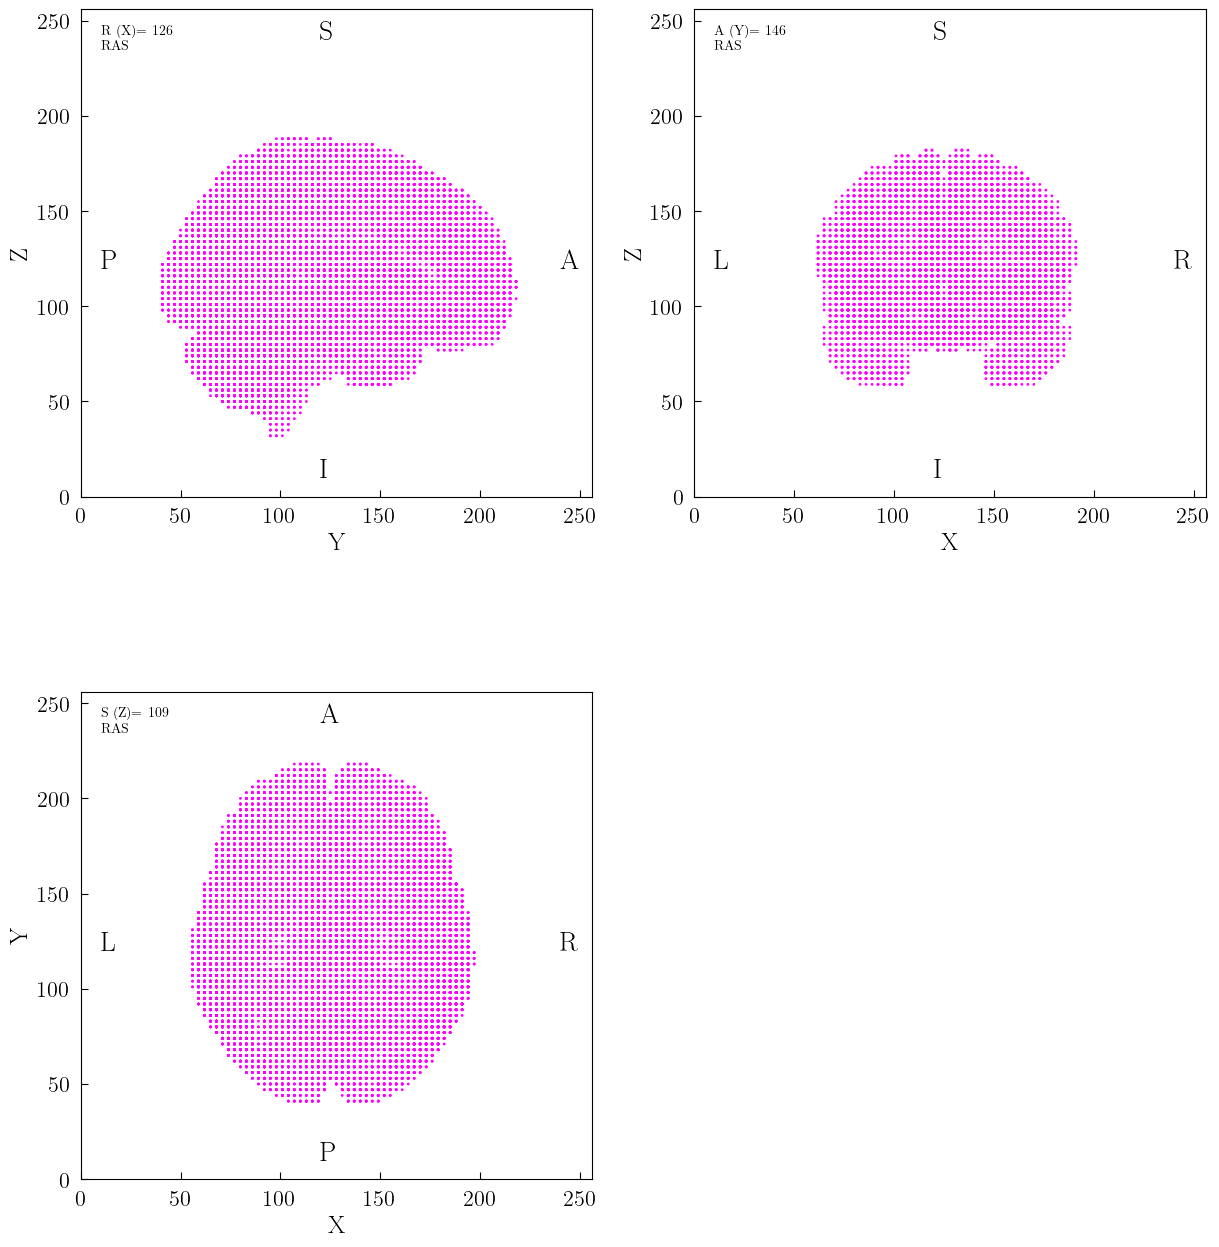

In [9]:
# Plot cortical region distribution
print(f"Source space n points: {cerebra.src_space_labels.shape}")
# Visualize source spaceremove_axis
cerebra.plot_3d(plot_regions=False, plot_src_space=True)
cerebra.orthoview(plot_regions=False,plot_src_space=True,s=1)

In [ ]:
# %matplotlib qt

[   0.  820.   67.  613.   18.   41.  185.  569.  140.  745.  964.  581.
  462.  666.   69.  341.  312.   31.   93.   56.   80.  250.  298.  386.
  480.    6.  222.   62. 1057.   11.  124.  696.  296.  163.  844.  798.
  116.   22. 1986.  459.  394.  365.  485.  303.  135.  922. 2666.  203.
  179.  208.  165.  590.  805.   89.  609.   23.   43.  185.  577.  145.
  717.  967.  636.  456.  674.   71.  328.  313.   32.   96.   51.   95.
  245.  296.  339.  511.    7.  221.   63. 1078.   42.  151.  694.  280.
  168.  838.  780.  110.   26. 1932.  473.  388.  357.  465.  316.  135.
  933. 2657.  208.  179.  213.  165.  572.    0.]
     Mindboggle ID              Label Name  CerebrA ID hemisphere cortical  \
0              0.0                   Empty           0        NaN      NaN   
103            0.0            White matter         103        NaN      NaN   
25            92.0         Basal Forebrain          25      Right    False   
76            92.0         Basal Forebrain          76

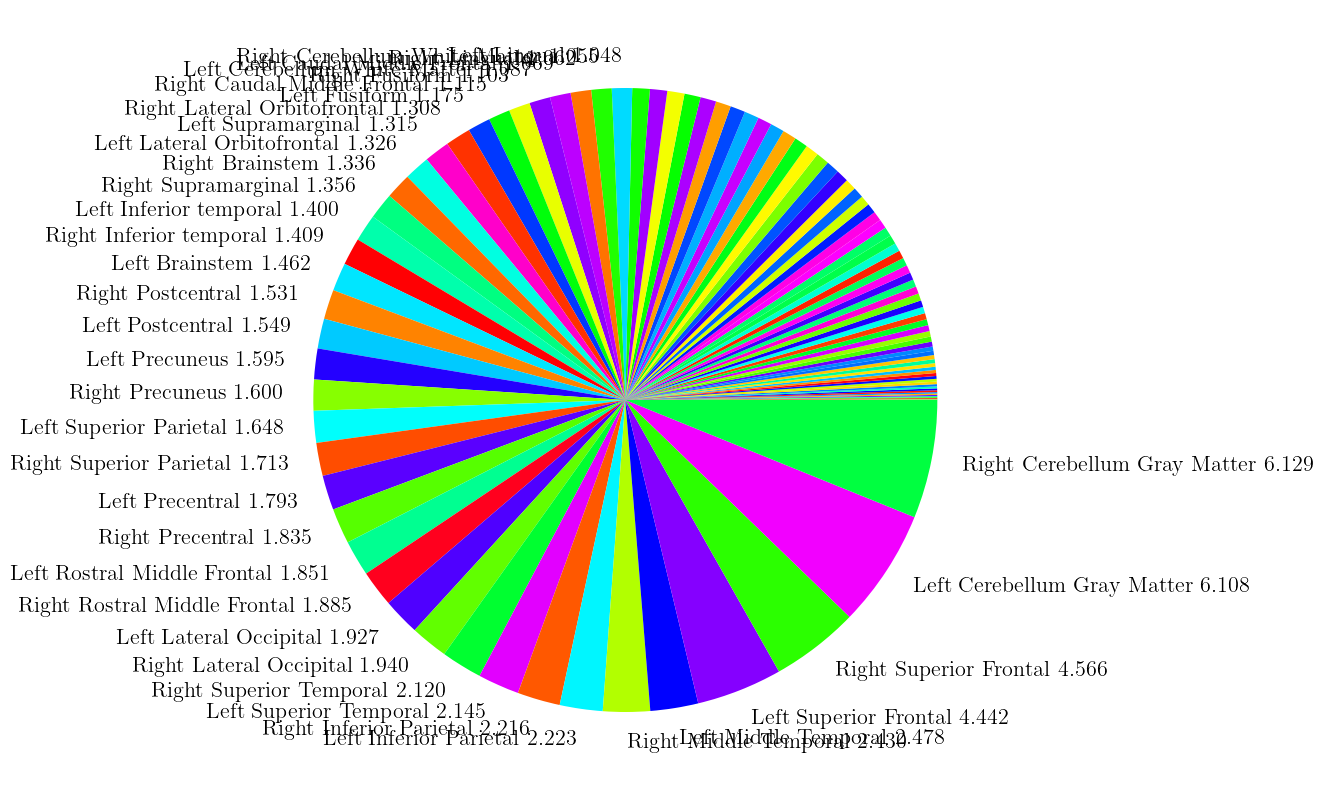

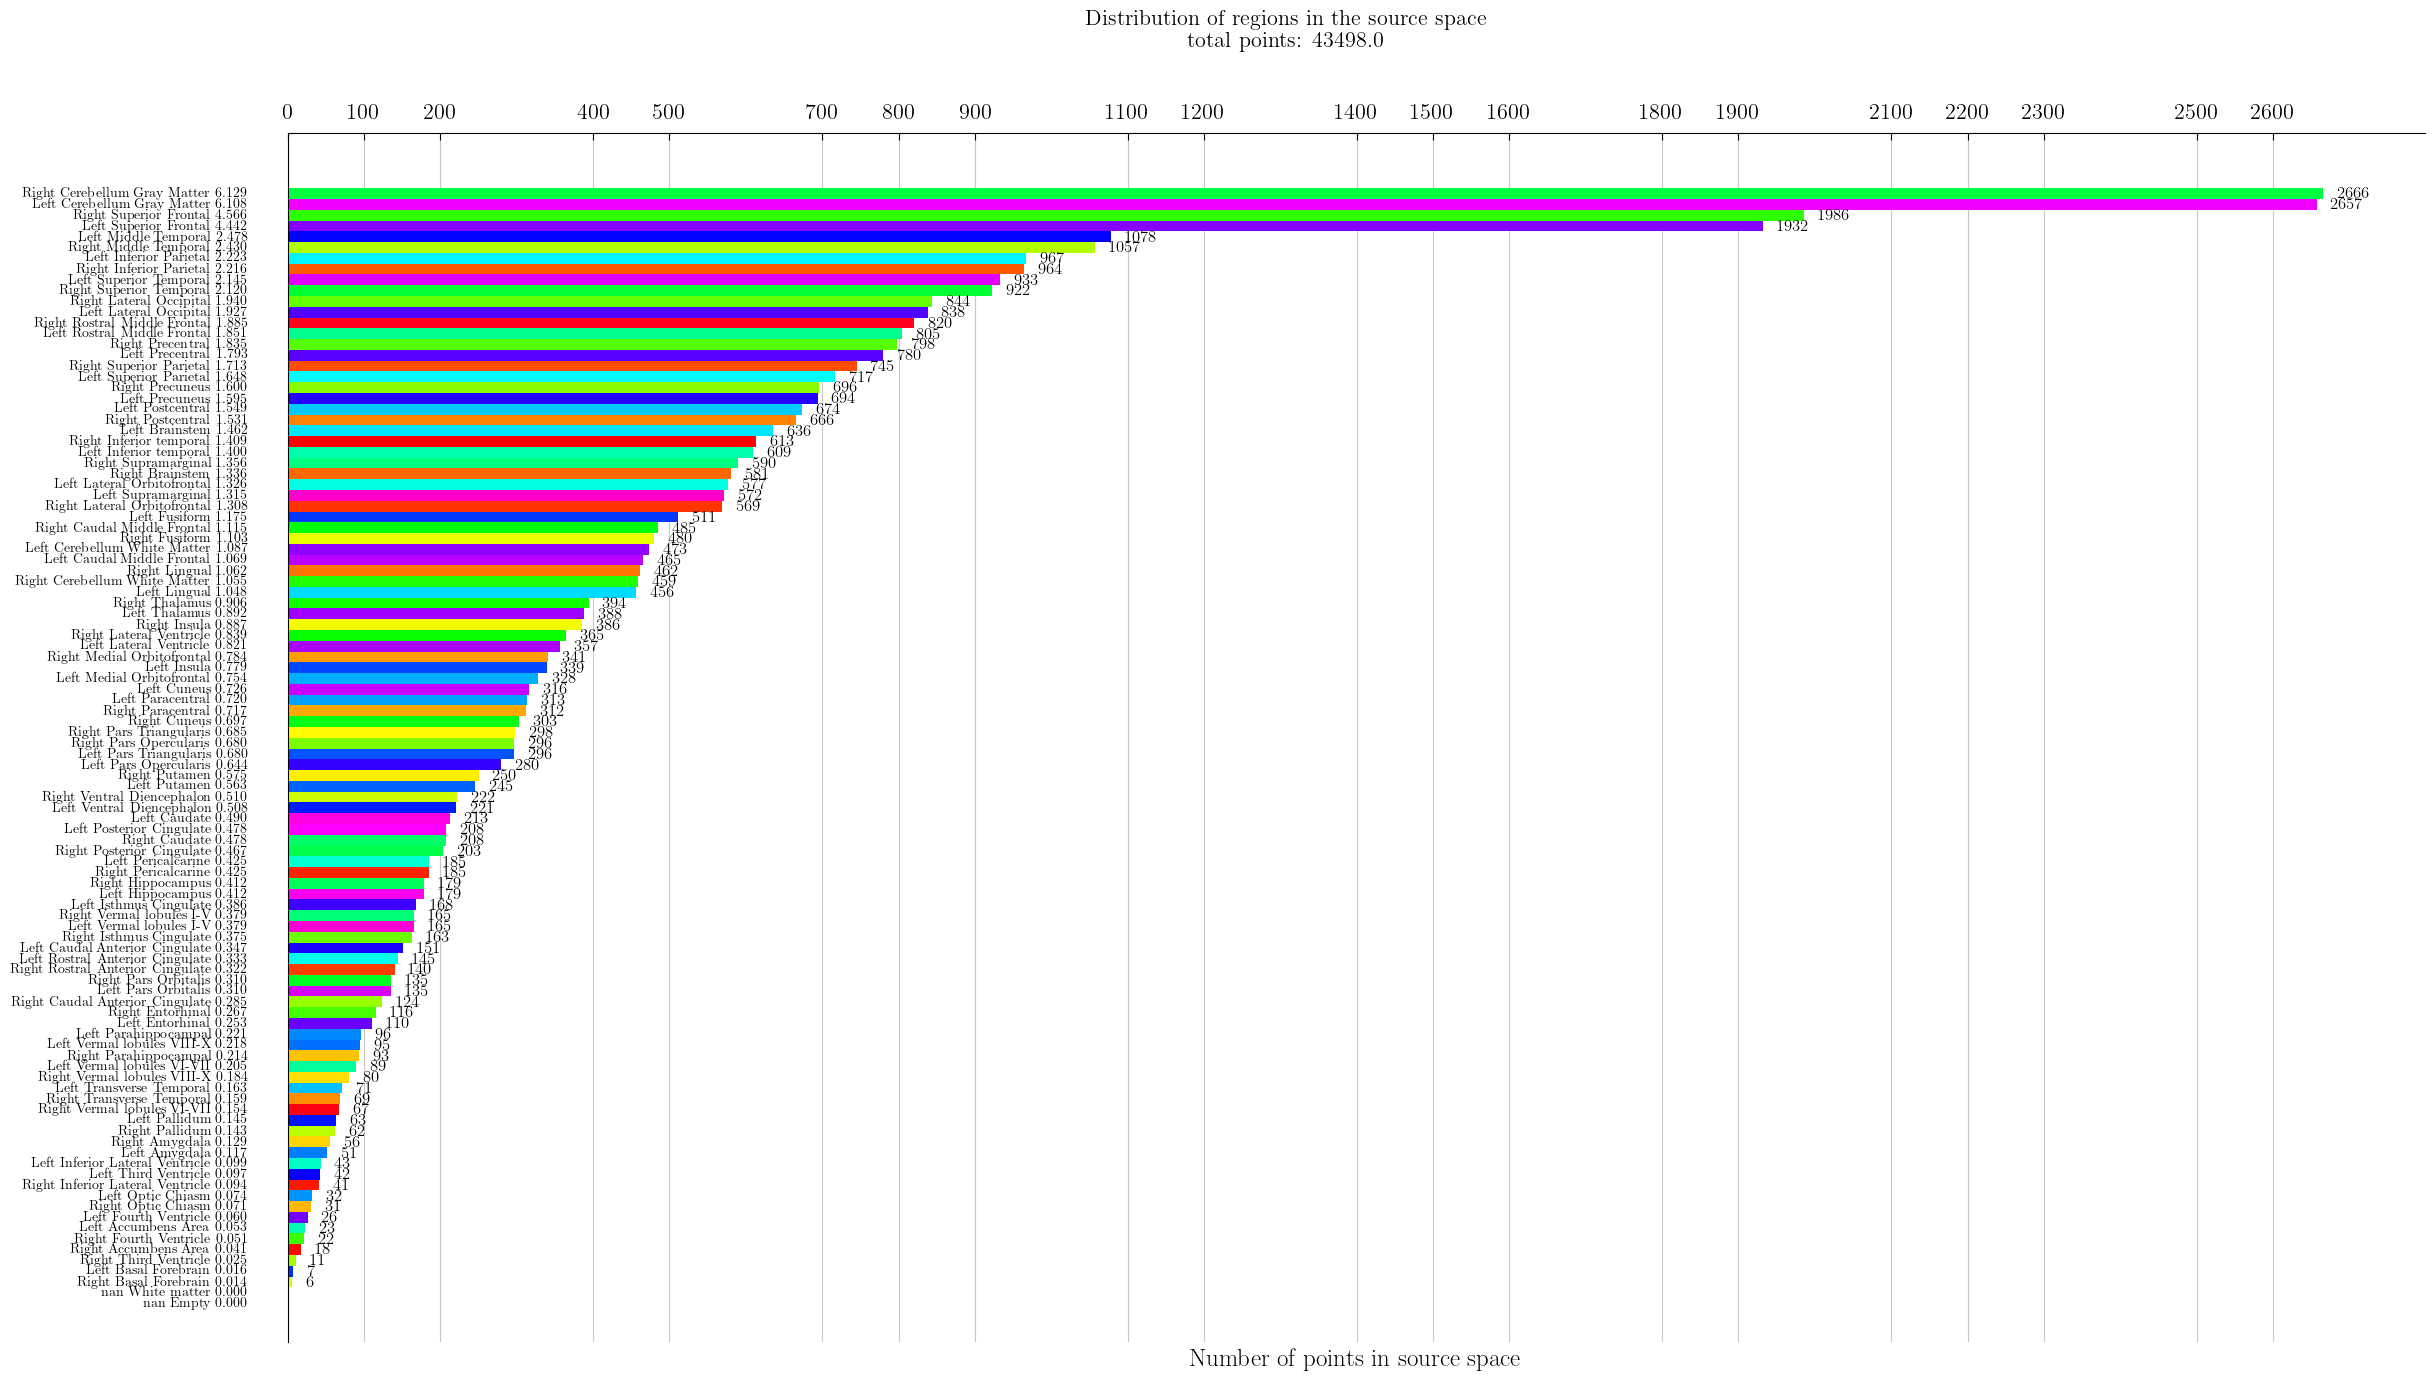

In [11]:
cerebra = CerebrA()
plt.close("all")

counts = np.zeros(104)
# for pt in cerebra.src_space_points:
regions = np.array([cerebra.get_region_id_from_point(pt) for pt in cerebra.src_space_points])
for r in regions:
    counts[r] += 1

print(counts)

# plt.hist(n_points)
cerebra.label_details["vol_src_count"] = counts
cerebra.label_details.sort_values(by=['vol_src_count'],inplace=True)
print(cerebra.label_details)
data = np.array([*cerebra.label_details["vol_src_count"].values])
colors = np.array([*cerebra.label_details["color"].values])
labels = np.array([*cerebra.label_details["Label Name"].values])
label_ids = np.array([*cerebra.label_details['CerebrA ID'].values])
hemispheres = np.array(cerebra.label_details['hemisphere'].values)
# label_ids [((hemisphere + " "+ l_id) if hemisphere else l_id) for (l_id,hemisphere) in zip(label_ids, cerebra.label_details['hemisphere'].values)]
tot_vol_src_count = np.array(cerebra.label_details['vol_src_count'].values).sum()
data = np.array([*cerebra.label_details["vol_src_count"].values])
labels = [(f"{h} {l} {count/tot_vol_src_count * 100:.3f}%" if h else str(l)) for l,h, count in zip(labels, hemispheres, data)]

# PIE CHART
fig2,ax2 = plt.subplots()
fig2.set_size_inches(12, 10)
threshold = data.sum() * 0.01
labels_pie = [l if data[i] > threshold else "" for i,l in enumerate(labels)]
ax2.pie(data,colors=colors,labels=labels_pie)
plt.show()

# HISTOGRAM
fig, ax = plt.subplots()
ax = remove_ax(ax,keep_names=["left","top"])    
    
for i, n_pts in enumerate(data):
    if n_pts == 0:
        continue
    p =ax.barh(i,n_pts, color=colors[i], linestyle='-', height=1,label=labels[i],edgecolor = "white", linewidth=0)
    # ax.bar_label(p, label_type='edge', padding=10,fontsize=16)
    ax.bar_label(p, label_type='edge', padding=10,fontsize=12,fontweight='bold')

add_grid_to_ax(ax)
ax.xaxis.tick_top()

fig.suptitle(f"Distribution of regions in the source space\n total points: {tot_vol_src_count}")

ax.set_xlabel("Number of points in source space")
ax.set_xticks((np.linspace(0,data.max(),num=20) / 100).astype(int) *100)
# # Add labels to bins

for i,(name,id) in enumerate(zip(labels,label_ids)):
    ax.text(-data.max()*0.02,i, f"{name} id:{id}",fontsize=10,verticalalignment='center',horizontalalignment='right')

fig.set_size_inches(28.5, 15.5)




# mngr = plt.get_current_fig_manager()
# geom = mngr.window.geometry()
# x,y,dx,dy = geom.getRect()
# mngr.window.setGeometry(2600, 00, dx, dy)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

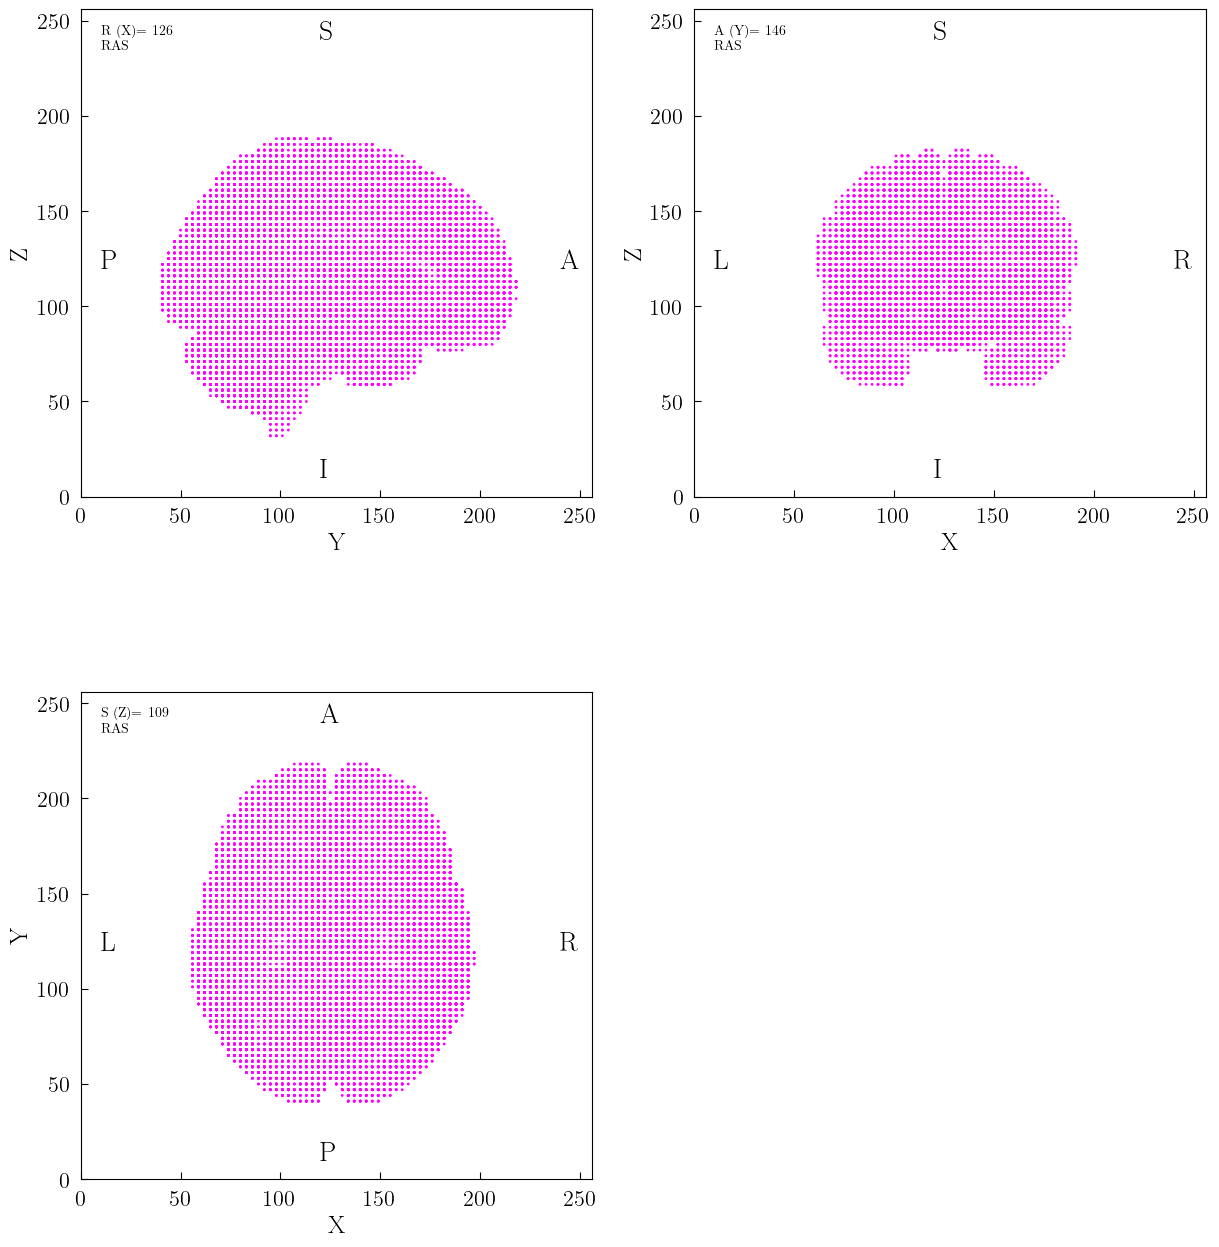

In [12]:
cerebra.orthoview(plot_affine=False, plot_whitematter=True,plot_regions=False, plot_src_space=True)

In [ ]:
cerebra.plot_3d(plot_src_space=True)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X (R)', ylabel='Y (A)', zlabel='Z (S)'>)

In [ ]:
cerebra.mni_average.vol_src

AttributeError: 'MNIAverage' object has no attribute 'vol_src'

In [ ]:

modify_src_space(cerebra.mni_average.vol_src)

In [ ]:
cerebra.orthoview(plot_affine=False, plot_whitematter=True,plot_regions=False, plot_src_space=True)

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))